# Chrun Prediction

In [7]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv(r"C:\Users\kapil\Desktop\Data Set\TelcoChurn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### As per the above information we find that total charges column has numerical values but seen as object type.
##### So we will be focusing on changing the datatype to numeric.

In [12]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### There are 11 missing values in TotalCharges column. We can fill the missing values with median data, set it to 0 or delete these rows.
##### Here I will prefer deleting these columns because it is a small part compared to all data.

In [14]:
#delete rows including null values
df.dropna(inplace = True)

##### Here the focus is analyzing Churn.So we will be dropping Customer ID Column 

In [16]:
df.drop(["customerID"],axis=1,inplace = True)

##### Replace text columns to integers.

In [17]:
df.gender = [1 if each == "Male" else 0 for each in df.gender]

columns_to_convert = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'MultipleLines',
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies',
                      'PaperlessBilling', 
                      'Churn']

for item in columns_to_convert:
    df[item] = [1 if each == "Yes" else 0 if each == "No" else -1 for each in df[item]]
    
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,-1,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,-1,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


##### Let's have a quick look at the distribution of Churn values. As you can see below, the data set is imbalanced. But for now,ignore this.

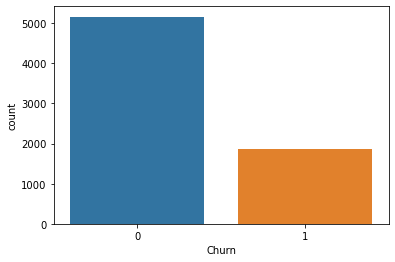

In [19]:
sns.countplot(x="Churn",data=df);

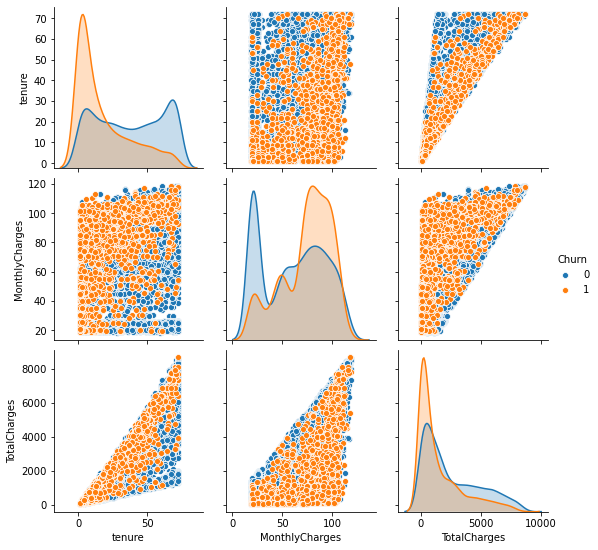

In [20]:
sns.pairplot(df,vars = ['tenure','MonthlyCharges','TotalCharges'], hue="Churn")

##### From above Customers having lower tenure and higher monthly charges are tend to churn more frequently. Also we can say some services were customers having month-to-month contract and fiber obtic internet have a really huge effect on churn probability.


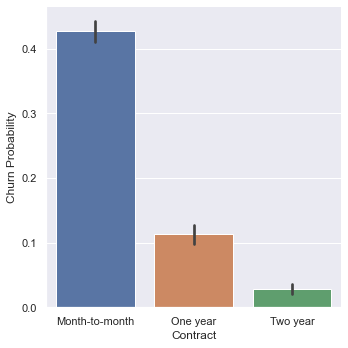

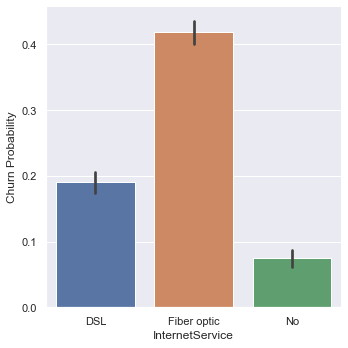

In [24]:
sns.set(style="darkgrid")
g1=sns.catplot(x="Contract", y="Churn", data=df,kind="bar")
g1.set_ylabels("Churn Probability")

g2=sns.catplot(x="InternetService", y="Churn", data=df,kind="bar")
g2.set_ylabels("Churn Probability")

##### Convert remaining text based columns to dummy columns using pandas get_dummies function. This function creates new columns named as values of the related columns.
##### Now our data set only have integer and numerical columns so that we can apply statistical models.


In [25]:
df = pd.get_dummies(data=df)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,-1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,-1,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


##### Let's see the correlation between churn and the remaining columns. Customers having month-to-month contract, having fiber optic internet service and using electronic payment are tend to churn more whereas people having two-year contract and having internet service are tend to not churn.


In [27]:
df.corr()['Churn'].sort_values()

tenure                                    -0.354049
Contract_Two year                         -0.301552
InternetService_No                        -0.227578
TotalCharges                              -0.199484
Contract_One year                         -0.178225
Dependents                                -0.163128
Partner                                   -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
gender                                    -0.008545
PhoneService                               0.011691
OnlineSecurity                             0.023014
TechSupport                                0.026744
MultipleLines                              0.036148
OnlineBackup                               0.073934
DeviceProtection                           0.084402
SeniorCitizen                              0.150541
StreamingMov

##### Prepare x and y

##### First, seperate x and y values. y would be our class which is Churn column in this dataset. x would be the remaing columns. Also, apply normalization to x in order to scale all values between 0 and 1.

In [28]:
#assign Class_att column as y attribute
y = df.Churn.values

#drop Class_att column, remain only numerical columns
new_data = df.drop(["Churn"],axis=1)

#Normalize values to fit between 0 and 1. 
x = (new_data-np.min(new_data))/(np.max(new_data)-np.min(new_data)).values

#### Splitting Data
##### Split the data set as train and test with %80-%20 ratio.

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (5625, 26) (5625,)
Test set: (1407, 26) (1407,)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [34]:
yhat = LR.predict(x_test)
yhat

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [35]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[0.81377865, 0.18622135],
       [0.7650205 , 0.2349795 ],
       [0.92917856, 0.07082144],
       ...,
       [0.95934913, 0.04065087],
       [0.40625884, 0.59374116],
       [0.38973387, 0.61026613]])

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[166 209]
 [ 81 951]]


Confusion matrix, without normalization
[[166 209]
 [ 81 951]]


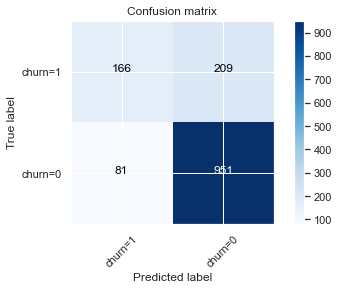

In [45]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [39]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1032
           1       0.67      0.44      0.53       375

    accuracy                           0.79      1407
   macro avg       0.75      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



##### Based on the count of each section, we can calculate precision and recall of each label:

###### Precision is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

###### Recall is true positive rate. It is defined as: Recall = TP / (TP + FN)

###### So, we can calculate precision and recall of each class.

###### F1 score: Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label.

###### The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

###### And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.79 in our case.



In [40]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.4295111520885586

### Log loss
##### Now, lets try log loss for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1. Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [52]:
yhat = neigh.predict(x_test)
yhat[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [54]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8375111111111111
Test set Accuracy:  0.7647476901208244


In [56]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.71, 0.75, 0.74, 0.76, 0.77, 0.78, 0.77, 0.78, 0.78])

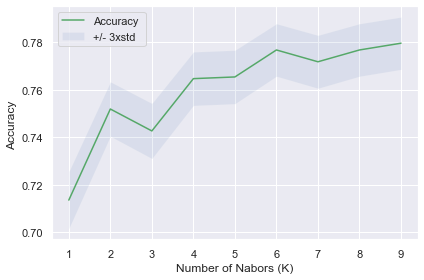

In [57]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

##### As you can see above, if we use K = 9, then we get maximum score of %78.00


In [58]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7796730632551528 with k= 9


In [59]:
# %%SVM Classification
from sklearn.svm import SVC
svc_model = SVC(random_state = 1)
svc_model.fit(x_train,y_train)
accuracy_svc = svc_model.score(x_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7995735607675906


In [60]:
# %%Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf_model_initial = RandomForestClassifier(n_estimators = 5, random_state = 1)
rf_model_initial.fit(x_train,y_train)
print("Random Forest accuracy for 5 trees is :",rf_model_initial.score(x_test,y_test))

Random Forest accuracy for 5 trees is : 0.7711442786069652


###### I set tree number as 5 initially. But I want to find the appropriate tree number. Let's try to find the best number with trying 1 to 50.


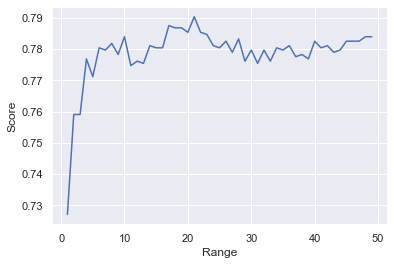

In [61]:
score_array = []
for each in range(1,50):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) #set K neighbor as 3
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))
    
plt.plot(range(1,50),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

###### As you can see, the highest accuracy is at n_estimators = 22.

In [63]:
rf_model = RandomForestClassifier(n_estimators = 22, random_state = 1) #set tree number as 33
rf_model.fit(x_train,y_train)
accuracy_rf = rf_model.score(x_test,y_test)
print("Random Forest accuracy for 22 trees is :",accuracy_rf)

Random Forest accuracy for 22 trees is : 0.7853589196872779


In [65]:
# the function that prints all scores
def print_scores(headline, y_true, y_pred):
    print(headline)
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_true, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_true, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score)

In [74]:
report = classification_report(y_test, LR.predict(x_test))
print(report)

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1032
           1       0.67      0.44      0.53       375

    accuracy                           0.79      1407
   macro avg       0.75      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



In [75]:
print_scores("Logistic Regression;",y_test, LR.predict(x_test))
print_scores("SVM;",y_test, svc_model.predict(x_test))
print_scores("KNN;",y_test, knn.predict(x_test))
print_scores("Random Forest;",y_test, rf_model.predict(x_test))

Logistic Regression;
accuracy:  0.7938877043354655
precision:  0.6720647773279352
recall:  0.44266666666666665
f1_score:  0.7786978855642158
SVM;
accuracy:  0.7995735607675906
precision:  0.658703071672355
recall:  0.5146666666666667
f1_score:  0.7911011476967573
KNN;
accuracy:  0.7427149964463398
precision:  0.5184135977337111
recall:  0.488
f1_score:  0.7401841765223799
Random Forest;
accuracy:  0.7853589196872779
precision:  0.640926640926641
recall:  0.44266666666666665
f1_score:  0.7714336191421145


###### CONCLUSION

    1 Since data set is imbalanced, we prefered to use F1 score rather than accuracy.
    2 Logistic Regression and SVM gives the highest F1 Score, so it is the best model.
    3 Sex has no impact on churn.
    4 People having month-to-month contract tend to churn more than people having long term conracts.
    5 As the tenure increases, the probability of churn decreases.
    6 As the monthly charges increases, the probability of churn increases.


In [77]:
## Saving the model
from joblib import dump, load
dump(LR, 'Churn Prediction')

['Churn Prediction']

In [92]:
## Using the model
from joblib import dump, load
model = load('Churn Prediction')
import numpy as np
features_as_input = np.array([[0,0,1,0,1,0,-1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1]])
model.predict(features_as_input)

array([0], dtype=int64)

##### Thanks !!! 